<a href="https://colab.research.google.com/github/hildahelin/Aerodynamics-Equations-in-Python/blob/main/EquationsofAerodynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

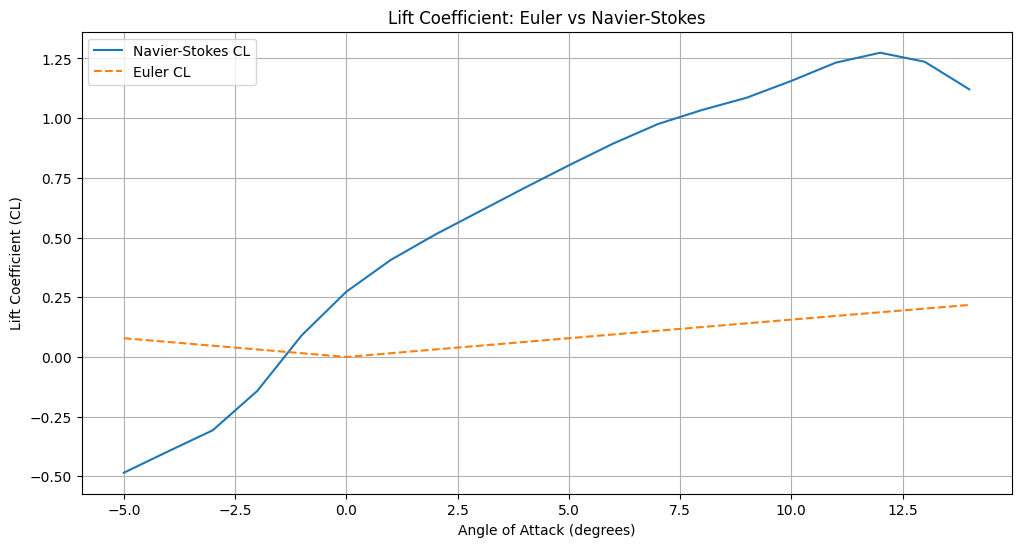

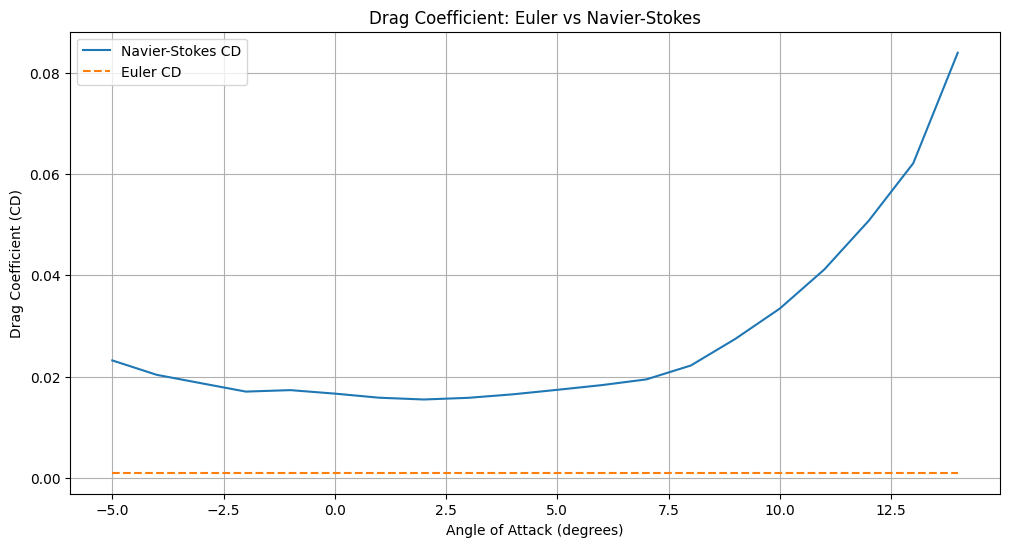

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def air_density_at_altitude(altitude_m):
    T0 = 288.15       # Sea level temperature (K)
    P0 = 101325       # Sea level pressure (Pa)
    L = 0.0065        # Temperature lapse rate (K/m)
    R = 287.05        # Gas constant for air (J/kgK)
    g = 9.80665       # Gravity acceleration (m/s^2)

    if altitude_m <= 11000:
        T = T0 - L * altitude_m
        P = P0 * (T / T0)**(g/(R*L))
        rho = P / (R * T)
    else:
        rho = 0.364  # Approximate value above 11 km (kg/m³)
    return rho

def euler_CL_CD(dp_array, rho, V):
    q = 0.5 * rho * V**2
    CL_array = dp_array / q
    CD_array = np.full_like(CL_array, 0.001)  # Small constant drag for Euler
    return CL_array, CD_array

def calculate_forces(CL, CD, rho, V, S):
    q = 0.5 * rho * V**2
    L = q * S * CL
    D = q * S * CD
    return L, D

def read_polar(filename):
    alphas, CLs, CDs = [], [], []
    with open(filename, 'r') as f:
        start = False
        for line in f:
            line = line.strip()
            if line.lower().startswith('alpha'):
                start = True
                continue
            if start:
                if line == '' or '------' in line:
                    continue
                parts = line.split()
                if len(parts) >= 3:
                    try:
                        alphas.append(float(parts[0]))
                        CLs.append(float(parts[1]))
                        CDs.append(float(parts[2]))
                    except:
                        continue
    return np.array(alphas), np.array(CLs), np.array(CDs)

def sample_dp_for_angles(alphas):
    dp = 1500 * np.abs(np.sin(np.radians(alphas)))
    return dp

if __name__ == "__main__":
    altitude = 3700  # meters (12,000 feet)
    rho = air_density_at_altitude(altitude)
    cruise_speed_kmh = 226
    cruise_speed = cruise_speed_kmh / 3.6  # m/s
    wing_area = 16.2  # m^2

    navier_file = "naca2412polar_navier.txt"
    alphas_nav, CLs_nav, CDs_nav = read_polar(navier_file)

    dp_array = sample_dp_for_angles(alphas_nav)

    CL_euler, CD_euler = euler_CL_CD(dp_array, rho, cruise_speed)

    L_euler, D_euler = calculate_forces(CL_euler, CD_euler, rho, cruise_speed, wing_area)

    plt.figure(figsize=(12,6))
    plt.plot(alphas_nav, CLs_nav, label="Navier-Stokes CL")
    plt.plot(alphas_nav, CL_euler, '--', label="Euler CL")
    plt.xlabel("Angle of Attack (degrees)")
    plt.ylabel("Lift Coefficient (CL)")
    plt.title("Lift Coefficient: Euler vs Navier-Stokes")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(alphas_nav, CDs_nav, label="Navier-Stokes CD")
    plt.plot(alphas_nav, CD_euler, '--', label="Euler CD")
    plt.xlabel("Angle of Attack (degrees)")
    plt.ylabel("Drag Coefficient (CD)")
    plt.title("Drag Coefficient: Euler vs Navier-Stokes")
    plt.legend()
    plt.grid(True)
    plt.show()
